In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
%matplotlib inline

## MNIST dataset

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train[0]

5

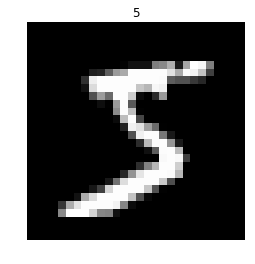

In [7]:
plt.imshow(X_train[0], 'gray')
plt.title(y_train[0])
plt.axis('off');

In [9]:
## Preprocesamiento
print(X_train.min(), X_train.max())

# Normalizamos
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5
print(X_train.min(), X_train.max())

(-1.0, 1.0)

In [10]:
X_train.shape

(60000, 28, 28)

In [12]:
# Las imagenes por defecto son de 28x28
# Para Fully-Connected Networks usaremos una vector de 784 (28x28)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
## One Hot encoder

print(y_train[0])

# Aplicamos la funcion "to_categorical" para llevar a un vector de dimension 10
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Construyendo el modelo en Keras

In [16]:
model = Sequential()

model.add(Dense(10, activation='softmax', input_shape=(784,)))

model.compile(loss='categorical_crossentropy', optimizer=SGD(1e-2), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [18]:
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 1.0251 - acc: 0.7161 - val_loss: 0.6108 - val_acc: 0.8455
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.5549 - acc: 0.8527 - val_loss: 0.4839 - val_acc: 0.8702
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.4728 - acc: 0.8716 - val_loss: 0.4318 - val_acc: 0.8846
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.4333 - acc: 0.8805 - val_loss: 0.4002 - val_acc: 0.8911
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.4085 - acc: 0.8864 - val_loss: 0.3820 - val_acc: 0.8944


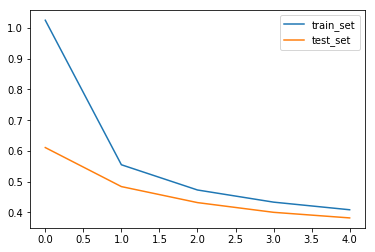

In [19]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend();

- Experimentar cambiando el learning rate
- Aumentando las capas de la red